In [ ]:
!mkdir -p /content/drive/MyDrive/DeepLearning/Project_01

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls /content/gdrive/MyDrive/DeepLearning/Project_01

01_classify_image.ipynb       cnn_models.py  __pycache__
01_classify_image_top3.ipynb  dataset	     results


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/DeepLearning/Project_01')
from cnn_models import cnnModels

In [ ]:
import os
import pandas as pd
from tensorflow.keras.utils import load_img

def get_predictions(image_dir):
    model = cnnModels()
    model_name = ['ResNet50', 'VGGNet16', 'InceptionV3', 'ConvNeXt', 'EfficientNet']
    result_df = pd.DataFrame(columns=model_name + [name + '_prob' for name in model_name])

    labels = []
    row_values = []

    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            image_path = os.path.join(image_dir, filename)
            img = load_img(image_path)
            labels.append(filename.split('.')[0])
            prob_preds = []
            class_preds = []
            for name in model_name:
                preds = model.classify_image(name, img)[0][0][1:3]
                class_preds.append(preds[0])   # class name
                prob_preds.append(preds[1])    # probability
            row_values.append(class_preds + prob_preds)

    result_df = pd.DataFrame(row_values, columns=model_name + [name + '_prob' for name in model_name])
    result_df['label'] = labels

    return result_df

In [ ]:
real_dir = '/content/gdrive/MyDrive/DeepLearning/Project_01/dataset/real'
fake_dir = '/content/gdrive/MyDrive/DeepLearning/Project_01/dataset/synthetic'

In [ ]:
real_result = get_predictions(real_dir)
fake_result = get_predictions(fake_dir)

# Save results to CSV files inside the results folder
real_result.to_csv('/content/gdrive/MyDrive/DeepLearning/Project_01/results/real_result.csv', index=False)
fake_result.to_csv('/content/gdrive/MyDrive/DeepLearning/Project_01/results/fake_result.csv', index=False)

print("✅ Results saved!")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
114735104/114735104 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
268326632/268326632 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


✅ Results saved!


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/DeepLearning/Project_01/results/fake_result.csv')
df.head()  # or df[['label', 'ResNet50', 'ResNet50_prob', ...]]

,ResNet50,VGGNet16,InceptionV3,ConvNeXt,EfficientNet,ResNet50_prob,VGGNet16_prob,InceptionV3_prob,ConvNeXt_prob,EfficientNet_prob,label
0,Pembroke,sunglasses,stopwatch,fountain,sunglass,0.415618,0.422213,0.999368,0.272037,0.074013,cow
1,hen,cock,clog,hen,hen,0.539845,0.519462,0.999394,0.792900,0.073929,hen
2,car_mirror,mountain_tent,clog,bullet_train,bullet_train,0.556300,0.316349,0.916537,0.549760,0.724472,train
3,hamper,Persian_cat,flatworm,tabby,tiger_cat,0.361622,0.572489,0.999989,0.236591,0.460889,cat
4,candle,candle,stole,bakery,stove,0.674406,0.387122,0.996276,0.253722,0.104777,cake


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/DeepLearning/Project_01/results/real_result.csv')
df.head()  # or df[['label', 'ResNet50', 'ResNet50_prob', ...]]

,ResNet50,VGGNet16,InceptionV3,ConvNeXt,EfficientNet,ResNet50_prob,VGGNet16_prob,InceptionV3_prob,ConvNeXt_prob,EfficientNet_prob,label
0,muzzle,miniature_pinscher,hammer,hen,chainlink_fence,0.387831,0.080818,0.992979,0.074760,0.117290,cow
1,ballpoint,pencil_box,pitcher,tennis_ball,saltshaker,0.219144,0.247788,0.583442,0.385472,0.073685,toy
2,pot,sulphur_butterfly,flatworm,hummingbird,reel,0.256225,0.187836,0.674159,0.388867,0.106786,flower
3,Persian_cat,Persian_cat,web_site,Persian_cat,Arctic_fox,0.832892,0.668904,1.000000,0.591548,0.437030,dog
4,African_grey,quail,web_site,African_grey,window_screen,0.945016,0.481908,0.990673,0.858052,0.503707,bird


In [ ]:
def format_top1(model, prob):
    return f"{model} ({prob:.2f})"$

table_df = pd.DataFrame()
table_df['filename'] = df['label']

for model in ['ResNet50', 'VGGNet16', 'InceptionV3', 'ConvNeXt', 'EfficientNet']:
    table_df[model] = df.apply(lambda row: format_top1(row[model], row[f"{model}_prob"]), axis=1)

table_df.head()

,filename,ResNet50,VGGNet16,InceptionV3,ConvNeXt,EfficientNet
0,cow,muzzle (0.39),miniature_pinscher (0.08),hammer (0.99),hen (0.07),chainlink_fence (0.12)
1,toy,ballpoint (0.22),pencil_box (0.25),pitcher (0.58),tennis_ball (0.39),saltshaker (0.07)
2,flower,pot (0.26),sulphur_butterfly (0.19),flatworm (0.67),hummingbird (0.39),reel (0.11)
3,dog,Persian_cat (0.83),Persian_cat (0.67),web_site (1.00),Persian_cat (0.59),Arctic_fox (0.44)
4,bird,African_grey (0.95),quail (0.48),web_site (0.99),African_grey (0.86),window_screen (0.50)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
real_df = pd.read_csv('/content/gdrive/MyDrive/DeepLearning/Project_01/results/real_result.csv')
fake_df = pd.read_csv('/content/gdrive/MyDrive/DeepLearning/Project_01/results/fake_result.csv')

# Model names
models = ['ResNet50', 'VGGNet16', 'InceptionV3', 'ConvNeXt', 'EfficientNet']

# Calculate accuracy for each model
real_accuracy = []
fake_accuracy = []

for model in models:
    real_acc = (real_df[model] == real_df['label']).mean()
    fake_acc = (fake_df[model] == fake_df['label']).mean()
    real_accuracy.append(real_acc)
    fake_accuracy.append(fake_acc)

In [ ]:
def soft_match(pred, label):
    return label.lower() in pred.lower()

real_accuracy = []
fake_accuracy = []

for model in models:
    real_acc = sum(soft_match(pred, label) for pred, label in zip(real_df[model], real_df['label'])) / len(real_df)
    fake_acc = sum(soft_match(pred, label) for pred, label in zip(fake_df[model], fake_df['label'])) / len(fake_df)
    real_accuracy.append(real_acc)
    fake_accuracy.append(fake_acc)

ResNet50: Real = 25.00%, Fake = 25.00%
VGGNet16: Real = 30.00%, Fake = 25.00%
InceptionV3: Real = 0.00%, Fake = 0.00%
ConvNeXt: Real = 30.00%, Fake = 35.00%
EfficientNet: Real = 10.00%, Fake = 25.00%


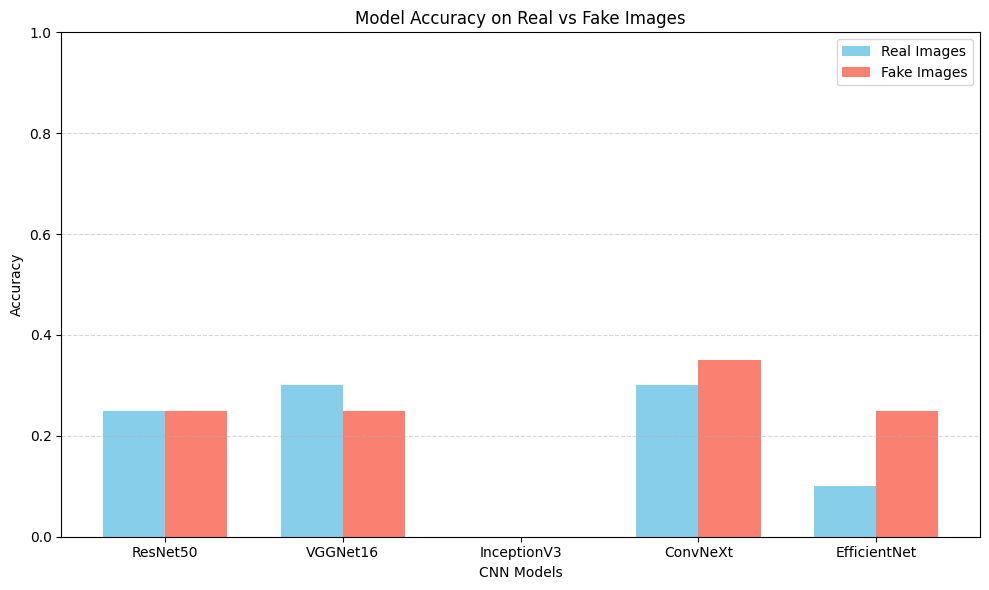

In [ ]:
import numpy as np

for i, model in enumerate(models):
    print(f"{model}: Real = {real_accuracy[i]*100:.2f}%, Fake = {fake_accuracy[i]*100:.2f}%")

# Plot the bar chart
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, real_accuracy, width, label='Real Images', color='skyblue')
plt.bar(x + width/2, fake_accuracy, width, label='Fake Images', color='salmon')

plt.xlabel('CNN Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Real vs Fake Images')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import time
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from cnn_models import cnnModels

In [ ]:
def measure_inference_time(image_path):
    model_names = ['ResNet50', 'VGGNet16', 'InceptionV3', 'ConvNeXt', 'EfficientNet']
    model = cnnModels()
    times = {}

    # Load image once
    img = load_img(image_path)

    for name in model_names:
        start = time.time()
        _ = model.classify_image(name, img)  # Run prediction
        end = time.time()
        times[name] = end - start  # Time taken

    return times

In [ ]:
image_path = '/content/gdrive/MyDrive/DeepLearning/Project_01/dataset/real/cow.jpg'  # Update with real image path
inference_times = measure_inference_time(image_path)

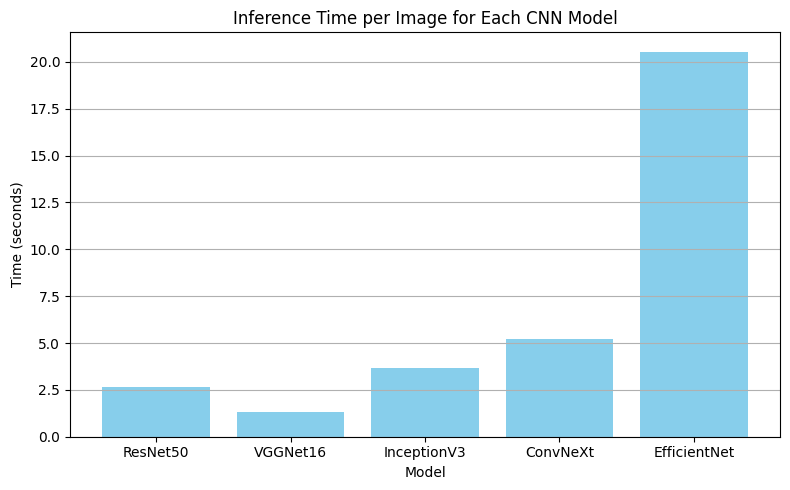

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(inference_times.keys(), inference_times.values(), color='skyblue')
plt.title('Inference Time per Image for Each CNN Model')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
image_path = '/content/gdrive/MyDrive/DeepLearning/Project_01/dataset/real/water_bottle.jpg'
inference_times = measure_inference_time(image_path)

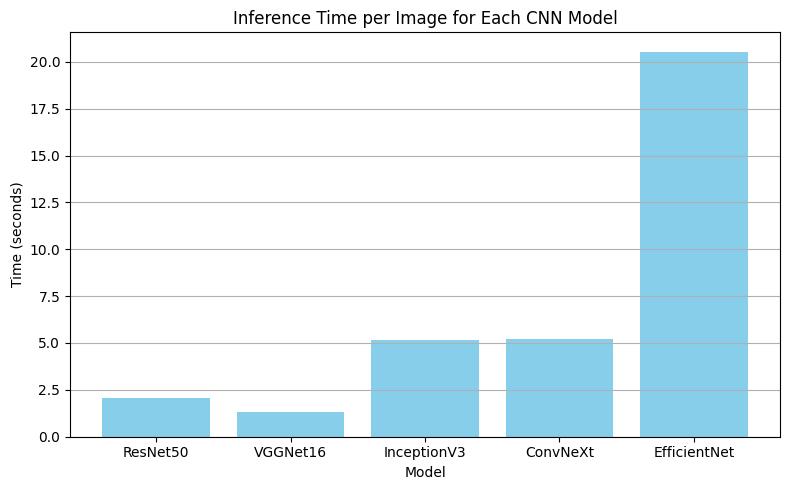

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(inference_times.keys(), inference_times.values(), color='skyblue')
plt.title('Inference Time per Image for Each CNN Model')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
image_path = '/content/gdrive/MyDrive/DeepLearning/Project_01/dataset/real/apple.jpg'
inference_times = measure_inference_time(image_path)

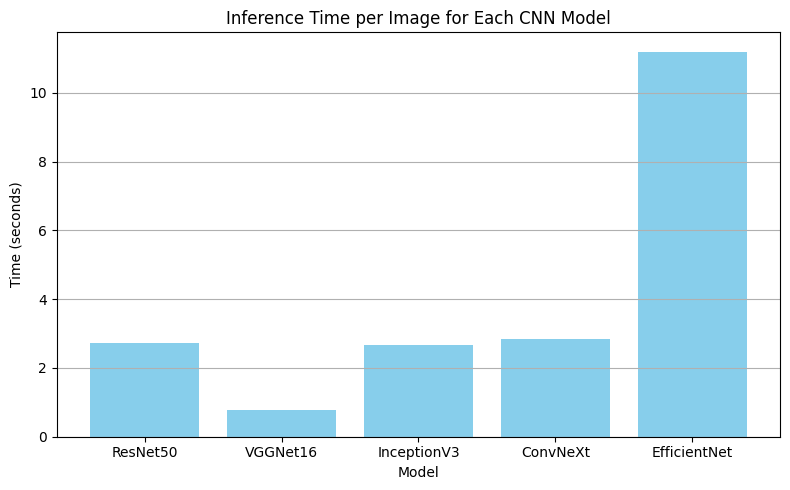

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(inference_times.keys(), inference_times.values(), color='skyblue')
plt.title('Inference Time per Image for Each CNN Model')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
image_path = '/content/gdrive/MyDrive/DeepLearning/Project_01/dataset/real/flower.jpg'
inference_times = measure_inference_time(image_path)

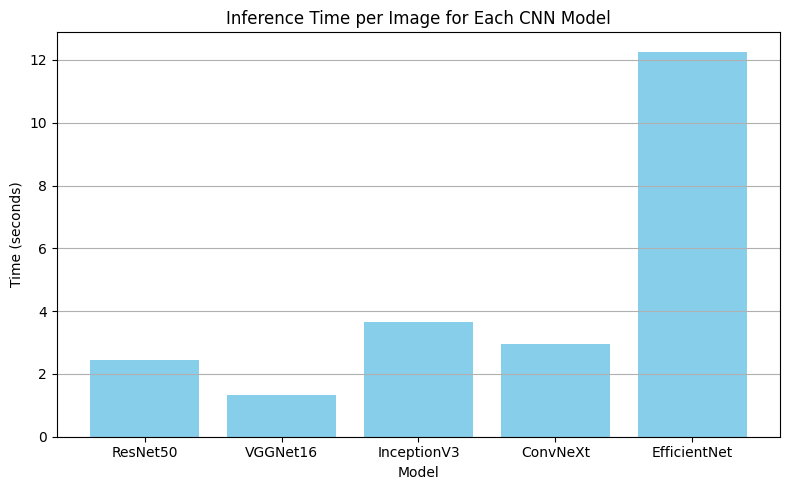

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(inference_times.keys(), inference_times.values(), color='skyblue')
plt.title('Inference Time per Image for Each CNN Model')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
image_path = '/content/gdrive/MyDrive/DeepLearning/Project_01/dataset/real/baby.jpg'
inference_times = measure_inference_time(image_path)

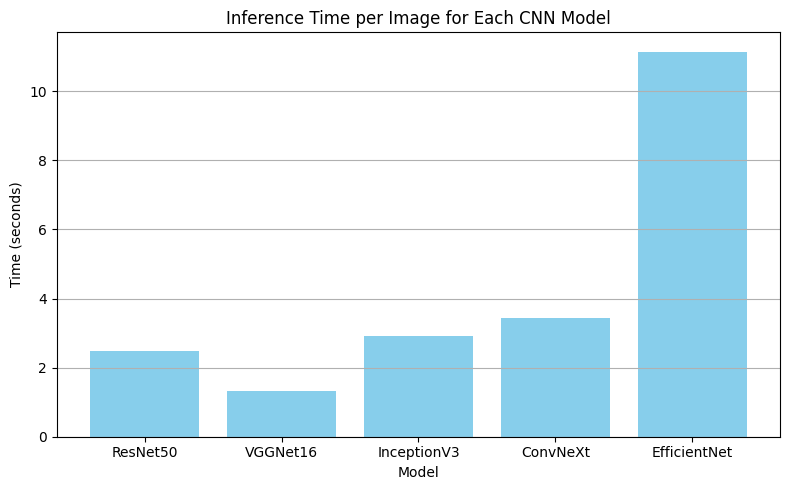

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(inference_times.keys(), inference_times.values(), color='skyblue')
plt.title('Inference Time per Image for Each CNN Model')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
import time
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from cnn_models import cnnModels  # make sure cnnModels.py is in your path

def measure_inference_time(image_path):
    model = cnnModels()
    model_names = ['ResNet50', 'VGGNet16', 'InceptionV3', 'ConvNeXt', 'EfficientNet']
    inference_times = {}

    # Load and preprocess image
    img = load_img(image_path, target_size=(224, 224))
    x = img_to_array(img)
    x = preprocess_input(x)
    x = x.reshape((1,) + x.shape)

    for name in model_names:
        start = time.time()
        _ = model.classify_image(name, img)
        end = time.time()
        inference_times[name] = round((end - start) * 1000, 2)  # in milliseconds

    return inference_times

In [ ]:
image_path = '/content/gdrive/MyDrive/DeepLearning/Project_01/dataset/real/pencil.jpg'
times = measure_inference_time(image_path)
print(times)

{'ResNet50': 2607.71, 'VGGNet16': 1359.77, 'InceptionV3': 3304.7, 'ConvNeXt': 2815.9, 'EfficientNet': 12007.49}


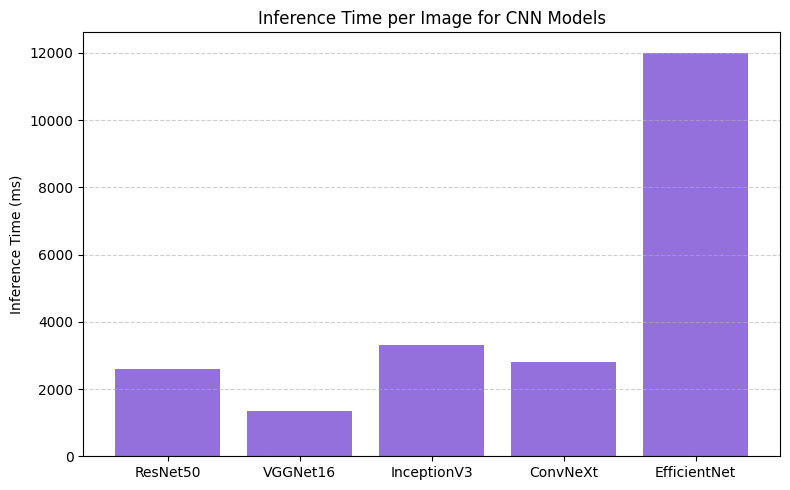

In [ ]:
import matplotlib.pyplot as plt

models = list(times.keys())
inference_time = list(times.values())

plt.figure(figsize=(8, 5))
plt.bar(models, inference_time, color='mediumpurple')
plt.ylabel('Inference Time (ms)')
plt.title('Inference Time per Image for CNN Models')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
plt.savefig('/content/gdrive/MyDrive/DeepLearning/Project_01/results/inference_time_chart.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
from keras.applications import ResNet50, VGG16, InceptionV3
from keras.applications import EfficientNetB7
from keras.applications import ConvNeXtTiny

def get_model_size(model, model_name):
    model.save(f'{model_name}.h5')
    size_mb = os.path.getsize(f'{model_name}.h5') / (1024 * 1024)
    return size_mb

models = {
    'ResNet50': ResNet50(weights='imagenet'),
    'VGGNet16': VGG16(weights='imagenet'),
    'InceptionV3': InceptionV3(weights='imagenet'),
    'ConvNeXt': ConvNeXtTiny(weights='imagenet'),
    'EfficientNet': EfficientNetB7(weights='imagenet'),
}

model_sizes = {}
for name, model in models.items():
    model_sizes[name] = get_model_size(model, name)

# Display sizes
for model_name, size in model_sizes.items():
    print(f"{model_name}: {size:.2f} MB")

ResNet50: 98.35 MB
VGGNet16: 527.87 MB
InceptionV3: 91.93 MB
ConvNeXt: 109.53 MB
EfficientNet: 256.59 MB


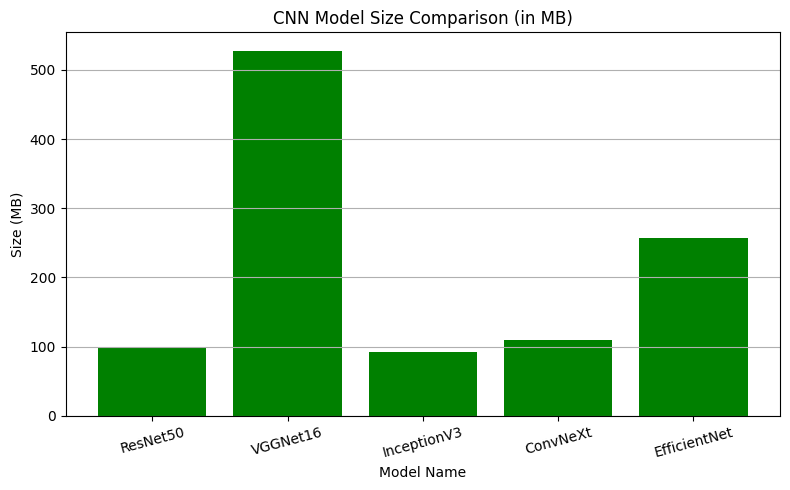

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(model_sizes.keys(), model_sizes.values(), color='green')
plt.title('CNN Model Size Comparison (in MB)')
plt.ylabel('Size (MB)')
plt.xlabel('Model Name')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()